# Assignment

1. use pandas read_csv with sep='\t' to read in the following 2 files available from the us naval academy:
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/keyword-tweets.txt'
- url = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/general-tweets.txt'
<br/> <span style="color:red" float:right>[1 point]</span>

2. concatenate these 2 data sets into a single data frame called LabeledTweets that has 2 columns, named Sentiment and Tweet <span style="color:red" float:right>[1 point]</span>

3. replace sentiment labels 'POLIT': 1, 'NOT': 0; <span style="color:red" float:right>[0 point]</span>

4. clean the tweets
   1. remove all tokens that contain a "@". Remove the whole token, not just the character.
   2. remove all tokens that contain "http". Remove the whole token, not just the characters.
   3. **replace** (not remove) all punctuation marks with a space (" ")
   4. **replace** all numbers with a space
   5. **replace** all non ascii characters with a space
   7. convert all characters to lowercase
   8. strip extra whitespaces
   9. lemmatize tokens
   9. No need to remove stopwords because TfidfVectorizer will take care of that
<br/><span style="color:red" float:right>[9 point]</span>

5. Use TfidfVectorizer from sklearn to prepare the data for machine learning.  Use max_features = 50;  <span style="color:red" float:right>[2 point]</span>

6. Use sklearn LogisticRegression to train a model on the  results on 75% of the data. <span style="color:red" float:right>[1 point]</span>

7. determine the accuracy on the training data and the test data.   Determine the baseline accuracy. <span style="color:red" float:right>[1 point]</span>

8. Repeat steps 5, 6, and 7  with TfidfVectorizer max_features set to 5, 500, 5000, 50000 and discuss your accuracies. <span style="color:red" float:right>[2 point]</span>

# End of assignment

In [1]:
import pandas as pd
import numpy as np
import string
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
import nltk

In [3]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# 1. Use pandas read_csv with sep='\t' to read in the following 2 files available from the us naval academy

# url file:
url1 = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/keyword-tweets.txt'
col_names = ['Sentiment', 'Tweet']

# Download the data
usn1 = pd.read_csv(url1, sep='\t', names = col_names)
usn1.head()

,Sentiment,Tweet
0,POLIT,Global Voices Online Â» Alex Castro: A liberal...
1,POLIT,Do the Conservatives Have a Death Wish? http:/...
2,NOT,@MMFlint I've seen all of your movies and Capi...
3,POLIT,RT @AllianceAlert: * House Dems ask for civili...
4,POLIT,RT @AdamSmithInst Quote of the week: My politi...


In [5]:
# url file
url2 = 'https://www.usna.edu/Users/cs/nchamber/data/twitter/general-tweets.txt'
col_names = ['Sentiment', 'Tweet']

# Download the data
usn2 = pd.read_csv(url2, sep='\t', names = col_names)
usn2.head()

,Sentiment,Tweet
0,NOT,Bumping dj sefs mixtape nowww this is my music...
1,NOT,#ieroween THE STORY OF IEROWEEN! THE VIDEO ->>...
2,NOT,trick or treating at the mall today; ZOO! last...
3,NOT,@Ussk81 PMSL!!! I try not to stare but I can't...
4,NOT,@Sc0rpi0n676 btw - is there a remote chance i ...


**Reason: Use pandas read_csv to upload the data using the provided websites for further analysis.**

**Conclusion: Successfully uploaded data from the two provided websites and displayed a portion of data from each website.**

In [6]:
# 2. Concatenate these 2 data sets into a single data frame called LabeledTweets that has 2 columns, named Sentiment and Tweet

# Concatenate the two DataFrames
LabeledTweets = pd.concat([usn1, usn2], axis=0)

# Rename the columns
LabeledTweets.columns = ['Sentiment', 'Tweet']

**Reason: To concatenate the two provided data sets into a single data frame and call it LabeledTweets. Then ensure LabeledTweets has 2 columns named Sentiment and Tweet.**

**Conclusion: Successfully concatenated the two dataframes and named the columns Sentiment and Tweet.**

In [7]:
# 3. Replace sentiment labels 'POLIT': 1, 'NOT': 0

# Replace sentiment labels
LabeledTweets['Sentiment'] = LabeledTweets['Sentiment'].replace({'POLIT': 1, 'NOT': 0})

# Print the first few rows of the DataFrame
# print(LabeledTweets)
LabeledTweets.head()

,Sentiment,Tweet
0,1,Global Voices Online Â» Alex Castro: A liberal...
1,1,Do the Conservatives Have a Death Wish? http:/...
2,0,@MMFlint I've seen all of your movies and Capi...
3,1,RT @AllianceAlert: * House Dems ask for civili...
4,1,RT @AdamSmithInst Quote of the week: My politi...


**Reason: To replace the sentiment labels Polit with 1 and Not with 0.**

**Conclusion: Successfully created a binary column for Sentiment instead of strings Polit and Not. This will help with further analysis.**

In [ ]:
# 4. Clean the tweets by doing the following:

# Removing all tokens that contain a "@". Remove the whole token, not just the character.
# Removing all tokens that contain "http". Remove the whole token, not just the characters.
# Replacing (not remove) all punctuation marks with a space (" ")
# Replacing all numbers with a space
# Replacing all non ascii characters with a space
# Converting all characters to lowercase
# Striping the extra whitespaces
# Lemmatizing tokens
# and remembering not to remove stopwords because TfidfVectorizer will do that

In [8]:
def clean(text, list_of_steps):
    
    for step in list_of_steps:
        # step 1 remove entire tokens starting with ampersand
        if step == 'remove_amp':
            text = ' '.join([x for x in text.split() if not x.startswith("@")])
        # step 2 remove entire tokens starting with http    
        elif step == 'remove_http':
            text = ' '.join([x for x in text.split() if not x.startswith("http")])
        # step 3 replace punctuation with space     
        elif step == 'replace_punctuation':
            punct_exclude = set(string.punctuation)
            for char in text:
                if char in punct_exclude:
                    text = text.replace(char, ' ')
        # step 4 replace numbers    
        elif step == 'replace_numbers':
            for char in text:
                try:
                    if char.isdigit():
                        text = text.replace(char, ' ')
                except:
                    pass
        # step 5 replace non ascii characters with space    
        elif step == 'replace_non_ascii':
            for char in text:
                if ord(char) >= 128:
                    text = text.replace(char, ' ')
        # step 6 turn all text to lowercase    
        elif step == 'lower_case':
            text = text.lower()
        # step 7 strip the white space    
        elif step == 'strip_whitespace':
            text = ' '.join(text.split())
        # step 8 lemmatizze the words into their stems    
        elif step == 'lemmatize':
            lmtzr = WordNetLemmatizer()
            word_list = text.split(' ')
            stemmed_words = [lmtzr.lemmatize(word) for word in word_list]
            text = ' '.join(stemmed_words)
    # finally return the processed text        
    return text

# Outline the steps
step_list = ['remove_amp', 'remove_http', 'replace_punctuation', 'replace_numbers',
            'replace_non_ascii', 'lower_case', 'strip_whitespace', 'lemmatize']

In [59]:
# Create a test string
test_string = "@cbigscat // can **12 http//www asoccen''t snwbrd &dggo li,on from aè  LIONSGATE" 

**Created a test string to test the steps prior to applying the function to the entire dataframe**

In [60]:
# test on test string
clean_text = clean(test_string, step_list)
clean_text

'can asoccen t snwbrd dggo li on from a lionsgate'

**Testing the steps was a success.**

In [15]:
# apply the function on df by using the map function linked with the lambda function
LabeledTweets['clean_tweet'] = LabeledTweets['Tweet'].map(lambda s: clean(s, step_list))

# review dataframe
LabeledTweets

,Sentiment,Tweet,clean_tweet
0,1,Global Voices Online Â» Alex Castro: A liberal...,global voice online alex castro a liberal libe...
1,1,Do the Conservatives Have a Death Wish? http:/...,do the conservative have a death wish
2,0,@MMFlint I've seen all of your movies and Capi...,i ve seen all of your movie and capitalism is ...
3,1,RT @AllianceAlert: * House Dems ask for civili...,rt house dems ask for civility at town hall an...
4,1,RT @AdamSmithInst Quote of the week: My politi...,rt quote of the week my political opinion lean...
...,...,...,...
1995,0,@themoderngal ditto for me. i am having remors...,ditto for me i am having remorse for all the s...
1996,0,@ceebrito wats goodie my dominican brotha,wats goodie my dominican brotha
1997,0,yea my fone iz a DUBB,yea my fone iz a dubb
1998,0,@camerongarcia oh yes! My mom wanted to buy my...,oh yes my mom wanted to buy my dog one no thanks


In [17]:
LabeledTweets.dtypes

Sentiment       int64
Tweet          object
clean_tweet    object
dtype: object

**Checking data types**

**Reason:  To clean the tweets for legability.**

**Conclusion: Successfully cleaned all the tweets using multiple methods making the tweets more legable compared to what they were originally.**

In [ ]:
# 5. Use TfidfVectorizer from sklearn to prepare the data for machine learning. Use max_features = 50; 

In [20]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = LabeledTweets['clean_tweet']

# create a tfidVectorizer instance
vectorizer = TfidfVectorizer(max_features = 50)

# fit and transform our clean texts to a matrix
tfidf_matrix =  vectorizer.fit_transform(clean_texts)

# extract the column names
feature_names = vectorizer.get_feature_names_out()

# change the original matrix to a dense array
tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,about,afghanistan,all,and,are,at,be,but,by,can,...,time,to,up,wa,we,what,will,with,you,your
0,0.0,0.0,0.000000,0.489609,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.439826,0.261024,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.439826,0.0,0.0,0.0,0.0,0.0,0.0,0.447069
3,0.0,0.0,0.000000,0.294465,0.0,0.462642,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.000000,0.363663,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.401139,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.407745
4000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4001,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4002,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.27435,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


**Reason: To use TfidfVectorizer from sklearn to prepare the data for machine learning with the usage of max_features = 50.**

**Conclusion: All rows are still here prior to fitting which indicates that the data preservation. Successfully converted the text data into a format that can be used by machine learning algorithms.**

In [61]:
# 6. Use sklearn LogisticRegression to train a model on the results on 75% of the data.

# 7. Determine the accuracy on the training data and the test data. Determine the baseline accuracy.

# 8. Repeat steps 5, 6, and 7 with TfidfVectorizer max_features set to 5, 500, 5000, 50000 and discuss your accuracies.

In [21]:
# create targets, features are the tfidf_df
y_targets = LabeledTweets['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

**The TF-IDF dataframe already has the method needed for analysis so I utilize the sentiment values as our targets.**

In [22]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 50)


**3,003 is 75% of the original 4,004.**

In [23]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [24]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.8025308025308026
Test accuracy: 0.7642357642357642
Baseline accuracy: 0.5434565434565435


**I set the first model's max_feature parameter to 50. It produces a pretty good predictive model. The test accuracy is at 76% which portrays that it is not overfitting the data and is still giving a higher accuracy.**

In [25]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80       544
           1       0.82      0.62      0.71       457

    accuracy                           0.76      1001
   macro avg       0.78      0.75      0.75      1001
weighted avg       0.77      0.76      0.76      1001



**With max features set at 50, predictive ability for our algorithm is 80%. Max features at 50 gives enough information for predicting sentiment.**

In [26]:
# create a running list of dictionaries to hold the feature size and accuracy
accuracy_dict = [{'feature_size': 50, 'accuracy': test_acc.round(3)}]
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.764}]

**Max features set to: 5**

In [27]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = LabeledTweets['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 5)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,and,of,rt,the,to
0,1.000000,0.000000,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,1.000000,0.0
2,0.584523,0.659716,0.000000,0.472343,0.0
3,0.700878,0.000000,0.713281,0.000000,0.0
4,0.410944,0.463808,0.418217,0.664155,0.0
...,...,...,...,...,...
3999,0.000000,0.000000,0.000000,1.000000,0.0
4000,0.000000,0.000000,0.000000,0.000000,0.0
4001,0.000000,0.000000,0.000000,0.000000,0.0
4002,0.000000,0.000000,0.000000,0.000000,1.0


**This dataframe appears too simplistic to be of use for a sentiment prediction. The words presented are practically all conjunctions or prepositions.**

In [28]:
# create targets, features are the tfidf_df
y_targets = LabeledTweets['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [29]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 5)


In [30]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [31]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.617049617049617
Test accuracy: 0.5954045954045954
Baseline accuracy: 0.5434565434565435


**We only have 5 features which creates a pretty useless model that is correct around 60% of the time.**

In [32]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.62      0.67      0.64       544
           1       0.56      0.51      0.54       457

    accuracy                           0.60      1001
   macro avg       0.59      0.59      0.59      1001
weighted avg       0.59      0.60      0.59      1001



In [33]:
# continue to add to our running list of dictionaries
accuracy_dict.append({'feature_size': 5, 'accuracy': test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.764},
 {'feature_size': 5, 'accuracy': 0.595}]

**Max features set to: 500**

In [35]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = LabeledTweets['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 500)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,about,act,action,actually,afghanistan,after,again,against,all,already,...,www,ya,yeah,year,yes,yet,yo,york,you,your
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.248026,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.252111
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251600,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.255744
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.355827,0.0,0.0,0.0,0.0,0.000000


**This data frame appears to be reasonable. Words displayed are relevent and the number of features are deep enough to add value to our predictions.**

In [36]:
# create targets, features are the tfidf_df
y_targets = LabeledTweets['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [37]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 500)


In [38]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [39]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.9140859140859141
Test accuracy: 0.8551448551448552
Baseline accuracy: 0.5434565434565435


**Max features set to 500  produces a higher accuracy than max features set to 50. I believe we are approaching the overfitting real**

In [40]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       544
           1       0.88      0.80      0.83       457

    accuracy                           0.86      1001
   macro avg       0.86      0.85      0.85      1001
weighted avg       0.86      0.86      0.85      1001



In [41]:
accuracy_dict.append({'feature_size': 500, 'accuracy':test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.764},
 {'feature_size': 5, 'accuracy': 0.595},
 {'feature_size': 500, 'accuracy': 0.855}]

**Max features set to: 5000**

In [42]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = LabeledTweets['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,aaaaaaaaaaaaaaaaaaaaaah,aaaah,aan,aarp,ab,able,abortion,about,above,abroad,...,youth,youtube,yr,yu,zero,zijn,zippity,zombie,zoo,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# create targets, features are the tfidf_df
y_targets = LabeledTweets['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [45]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 5000)


In [46]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [47]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.9407259407259407
Test accuracy: 0.8471528471528471
Baseline accuracy: 0.5434565434565435


**Max features set to 5000 seem to drop slightly compared to max features set at 500. Both were still above 80%.**

In [48]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       544
           1       0.89      0.76      0.82       457

    accuracy                           0.85      1001
   macro avg       0.85      0.84      0.84      1001
weighted avg       0.85      0.85      0.85      1001



In [49]:
accuracy_dict.append({'feature_size': 5000, 'accuracy':test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.764},
 {'feature_size': 5, 'accuracy': 0.595},
 {'feature_size': 500, 'accuracy': 0.855},
 {'feature_size': 5000, 'accuracy': 0.847}]

**Max features set to: 50000**

In [50]:
# create instance of TfidVectorizer and apply it to the clean tweets column
clean_texts = LabeledTweets['clean_tweet']

vectorizer = TfidfVectorizer(max_features = 50000)
tfidf_matrix =  vectorizer.fit_transform(clean_texts)
# doc = 0
feature_names = vectorizer.get_feature_names_out()

tfidf_matrix_dense = tfidf_matrix.toarray()

# create and review dataframe
tfidf_df = pd.DataFrame(tfidf_matrix_dense, columns = feature_names)

tfidf_df

,aaaaaaaaaaaaaaaaaaaaaah,aaaaaahhhhhhh,aaaah,aagghh,aahh,aan,aanslag,aaron,aarp,ab,...,zombified,zona,zone,zoning,zoo,zorgen,zou,zshare,zu,zz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# create targets, features are the tfidf_df
y_targets = LabeledTweets['Sentiment']

# train test split the data into 75, 25 split
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, y_targets, train_size=0.75, random_state=42)

In [52]:
# review shape of training data
print(type(X_train), X_train.shape)

<class 'pandas.core.frame.DataFrame'> (3003, 10549)


In [53]:
# create logistic regression instance
lr = LogisticRegression(random_state=42)

# fit model to training data
lr.fit(X_train, y_train)

# predict results for both training and testing data
train_results = lr.predict(X_train)
test_results = lr.predict(X_test)

In [ ]:
# determine accuracy for testing and training data and baseline accuracy
train_acc = np.mean(y_train == train_results)
test_acc = np.mean(y_test == test_results)

print('Train accuracy: {}'.format(train_acc))
print('Test accuracy: {}'.format(test_acc))
print('Baseline accuracy: {}'.format(np.max([np.mean(y_test == 1), np.mean(y_test == 0)])))

Train accuracy: 0.9460539460539461
Test accuracy: 0.8381618381618382
Baseline accuracy: 0.5434565434565435


**Performance drops a little more with the max features set to 50000. Training accuracy is overfitting the data at this point. For our predictive model, I think we want to use lower max features. The higher number of features starts overfitting with accuracies getting above 90%.**

In [55]:
# Use sklearn.metrics to determine accuracy
print(classification_report(y_test, test_results))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       544
           1       0.89      0.74      0.81       457

    accuracy                           0.84      1001
   macro avg       0.85      0.83      0.83      1001
weighted avg       0.84      0.84      0.84      1001



In [56]:
# append new values to dictionary
accuracy_dict.append({'feature_size': 50000, 'accuracy':test_acc.round(3)})
accuracy_dict

[{'feature_size': 50, 'accuracy': 0.764},
 {'feature_size': 5, 'accuracy': 0.595},
 {'feature_size': 500, 'accuracy': 0.855},
 {'feature_size': 5000, 'accuracy': 0.847},
 {'feature_size': 50000, 'accuracy': 0.838}]

In [57]:
# create dataframe of accuracy and feature size
accuracy_df = pd.DataFrame(accuracy_dict)
accuracy_df = accuracy_df.set_index('feature_size')
accuracy_df.columns = ['TestAccuracy']

# display df
accuracy_df = accuracy_df.sort_index(ascending=True)

accuracy_df

,TestAccuracy
feature_size,
5,0.595
50,0.764
500,0.855
5000,0.847
50000,0.838


<AxesSubplot:title={'center':'Test Accuracy vs Feature Size'}, xlabel='Log(Feature Size)', ylabel='Percentage (%)'>

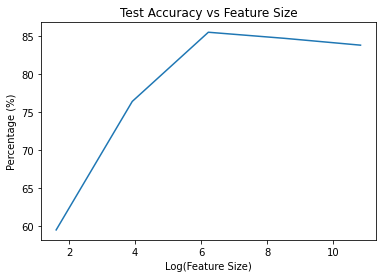

In [58]:
# Plot on a graph, but take the log of the feature size and convert TestAccuracy to percent
x = np.log(list(accuracy_df.index))
y = np.array(accuracy_df['TestAccuracy'])*100

plt.axes(title='Test Accuracy vs Feature Size', xlabel='Log(Feature Size)', ylabel='Percentage (%)')
sns.lineplot(x=x, y=y)

**Accuracy begins to trend as feature size increases. Predictive test accuracy significantly increases with feature size. Accuracy peaks and then drops slightly as Log(Feature Size) increases.**

**Reason: To use sklearn LogisticRegression to train a model on the results on 75% of the data, to determine the accuracy on the training data and the test data. Determine the baseline accuracy, and to repeat steps 5, 6, and 7 with TfidfVectorizer max_features set to 5, 500, 5000, 50000 and discuss your accuracies.**

**Conclusion: Conclusions are spread throughout the analysis. See above.** 